# Data type에 따른 기본적인 분석 
- learning by implementation 
- 데이터 준비

In [18]:
install.packages('tidyverse')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ readr   1.1.1
✔ tibble  1.4.1     ✔ purrr   0.2.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ ggplot2 2.2.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
# 모든 데이터는 데이터 프레임인 것을 가정 했고, dplyr패키지으 tbl_df()함수를 이용하여 
# 보기 좋은 형태로 변환 할 것 
mpg <- tbl_df(mpg)
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


##### Data description 
    -manufacturer: Manufacturer/brand name
    -model: Car model name
    -displ: Engine displacement, in litres
    -year: Year of manufacture
    -cyl: Number of cylinders
    -trans: Type of transmission
    -drv: f = front-wheel drive, r = rear wheel drive, 4 = 4wd
    -cty: City miles per gallon
    -hwy: Highway miles per gallon
    -fl: Fuel type. e = ethanol, d = diesel, r = regular, p =
    -premium, c = natural gas
    -class: The 'type' of car

### 모든 데이터에 행해야 할 분석 
1. 데이터 내용, 구조, 타입을 파악한다. dplyr::glimpse()함수가 유용하다. 이와 더불어, 데이터 구조를 파악 할 수 있는 str(), 데이터 앞부분을 보여주는 head() 등이 유용하다. 
2. 데이터의 summary()를 파악해본다. (Missing value또한 파악 할 수 있다.)
3. 무작정 시각화를 해본다. plot(), pairs() 등, 데이터가 많을 때는 실행시간이 오래 걸리니, dplyr::sample_n() 함수 등을 사용해 표본화한다. 데이터의 변수가 10개 이상 많을 때는 10열 씩 구분하여 살펴보는 것도 유용하다. 

In [7]:
glimpse(mpg)

Observations: 234
Variables: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi"...
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro"...
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0,...
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, ...
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, ...
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "a...
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4",...
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17...
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25...
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p",...
$ class        <chr> "compact", "compact", "compact", "compact", "compact",...


In [12]:
str(mpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


In [14]:
summary(mpg)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

### 수량형 변수의 분석 
- `데이터 분포의 시각화` : histogram, boxplot, pdf/pmf 등의 시각화를 시도 해본다. 
 > ggplot() + geom_{histogram, density}() 함수를 추천
- 요약 통계량 계산 : summary, mean, median, var, sd, mad, quantile 사용 
- 데이터 정규성 검정 : qqplot, qqline 함수로 분포가 정규분포와 얼마나 비슷한지 눈으로 볼 수 있다. 
- 이상점 찾아보기 : Robust 통계량 계산 

In [37]:
#  통계량 계산
summary(mpg$hwy)
print('mean')
mean(mpg$hwy)
print('median')
median(mpg$hwy)
print('range')
range(mpg$hwy)
quantile(mpg$hwy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   18.00   24.00   23.44   27.00   44.00 

[1] "mean"


[1] 23.44017

[1] "median"


[1] 24

[1] "range"


[1] 12 44

0%  25%  50%  75% 100% 
  12   18   24   27   44

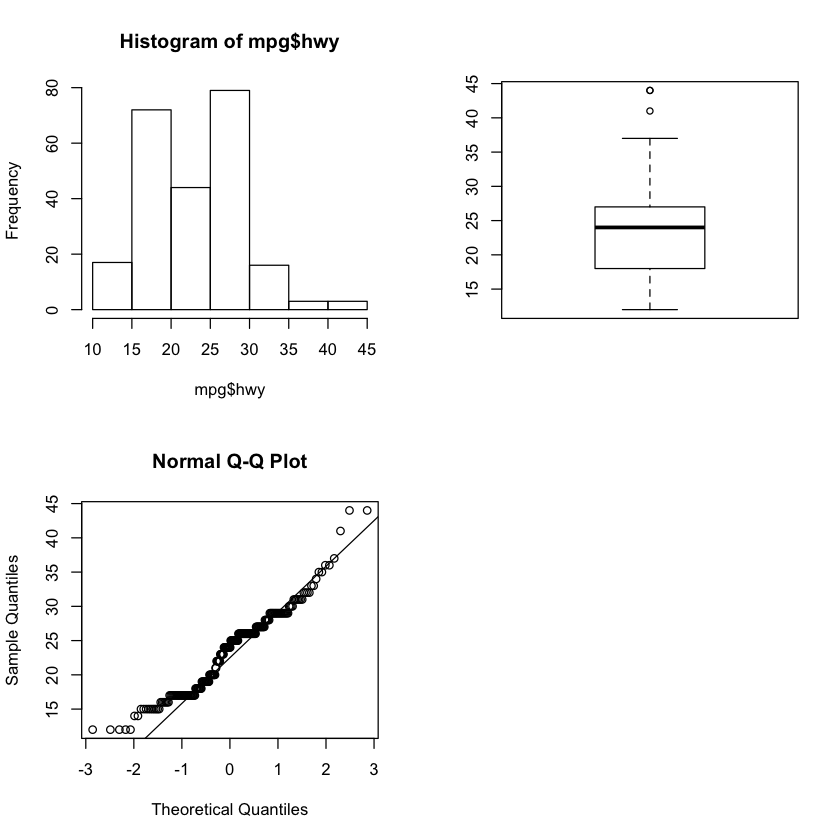

In [30]:
# 시각화 
opar <- par(mfrow=c(2,2))
hist(mpg$hwy) # histogram
boxplot(mpg$hwy) # boxplot
qqnorm(mpg$hwy) # qqplot
qqline(mpg$hwy) # 기준 선 
par(opar)

#### One sample t-test
ex> 
$ H_0 : \mu \leq 22.9 , H_1 : \mu \gt 22.9$

In [38]:
# One side test
hwy <- mpg$hwy
n <- length(hwy)
mu_0 <- 22.9
t.test(hwy, mu = mu_0, alternative="greater")


	One Sample t-test

data:  hwy
t = 1.3877, df = 233, p-value = 0.08328
alternative hypothesis: true mean is greater than 22.9
95 percent confidence interval:
 22.79733      Inf
sample estimates:
mean of x 
 23.44017 


In [43]:
# Two side test
t.test(hwy, mu=mu_0)


	One Sample t-test

data:  hwy
t = 1.3877, df = 233, p-value = 0.1666
alternative hypothesis: true mean is not equal to 22.9
95 percent confidence interval:
 22.67324 24.20710
sample estimates:
mean of x 
 23.44017 


#### Outliers와 Robust 통계 방법 
- 이상치를 확인 하는 가장 기초적인 방법은 boxplot을 그려보는 것 이다. 

> Boxplot에서 outliers는 [Q1 - 1.5 * IQR, Q3 + 1.5 * IRQ] (1.5는 R에서 그려줄 때 계산하는 값, 
꼭 1.5일 필요는 없다. )

- Robust 통계방법은 이상치의 영향을 적게 받는 절차라고 할 수 있다. 기본적으로 평균 대신, 중앙값, 표준편차 대신 MAD(Median Absolute Deviance)를 사용하면 된다. 

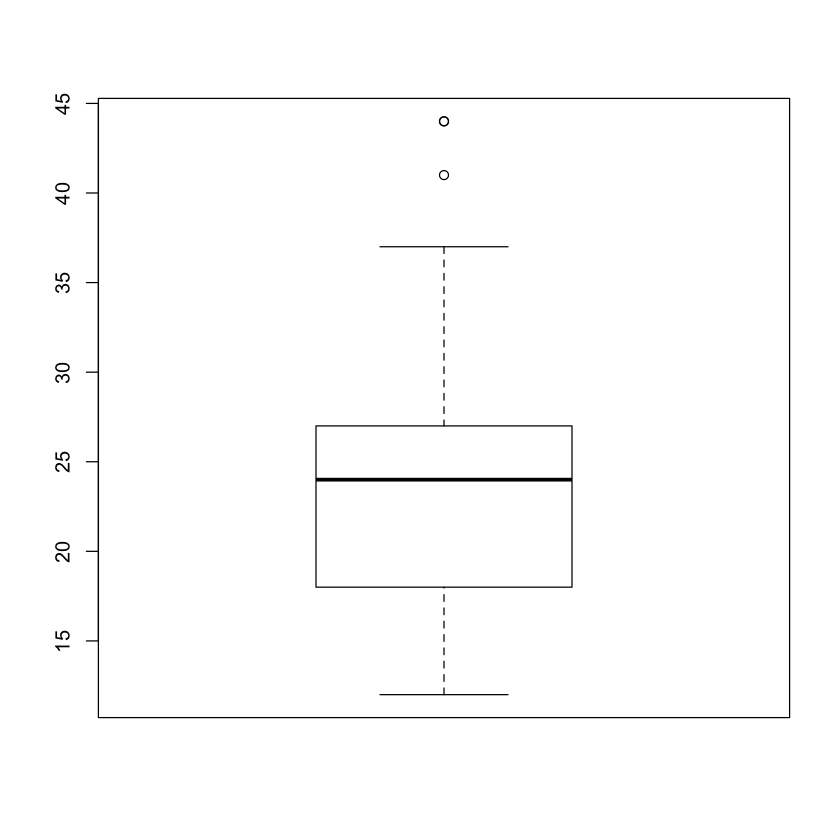

In [51]:
boxplot(hwy)

In [53]:
# Robust 통계량 계산 
c(mean(hwy), sd(hwy))
c(median(hwy), mad(hwy))

[1] 23.440171  5.954643

[1] 24.000  7.413

### Binary Categorical Data Analysis

- summary 계산 : table(), xtab() 등이 있다.  prob.table()함수는 도수를 상대도수로 바꿔준다. table() 함수는 도수 분포를 계산해준다. 결과는 xtabs 클래스 속성도 가지게 된다. 
- 데이터 분포의 시각화를 위해서는 boxplot()이 유용핟. 
- 가설검정과  신뢰구간 : binnorm.test()함수를 이용하면 이항 검정과 신뢰구간을 구할 수 있다. 

In [57]:
set.seed(777)
n <- 100 
p <- 0.5
x <- rbinom(n, 1, p)
x <- factor(x, levels=c(0,1), labels=c('no', 'yes'))
x

[1] yes no  no  yes yes no  no  no  yes no  yes yes yes yes yes no  no  yes
 [19] no  no  no  yes yes no  no  yes no  yes yes yes yes yes yes no  no  no 
 [37] yes no  yes yes no  no  yes no  no  yes yes yes yes no  yes no  no  no 
 [55] no  no  no  yes no  no  yes no  yes no  yes no  no  no  yes yes no  yes
 [73] yes no  no  yes no  yes yes no  no  no  no  no  no  no  no  no  yes yes
 [91] yes no  no  yes no  yes no  no  yes yes
Levels: no yes

In [61]:
table(x)
prop.table(table(x))

x
 no yes 
 54  46 

x
  no  yes 
0.54 0.46 

**가설 **
$H_0 : p = 0.5 , H_1 : p \neq 0.5$

In [62]:
binom.test(x=length(x[x=="yes"]), n=length(x), p=0.5, alternative='two.sided')


	Exact binomial test

data:  length(x[x == "yes"]) and length(x)
number of successes = 46, number of trials = 100, p-value = 0.4841
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3598434 0.5625884
sample estimates:
probability of success 
                  0.46 


### 오차한계, 표본 크기, sprt(n)의 힘 
- 표본크기에 따른 오차한계의 감소 

In [63]:
n <- c(100, 1000, 2000, 10000, 1e6)
data.frame(n=n, moe=round(1.96*sqrt(1/(4*n)), 4))

n,moe
1e+02,0.0980
1e+03,0.0310
2e+03,0.0219
1e+04,0.0098
1e+06,0.0010


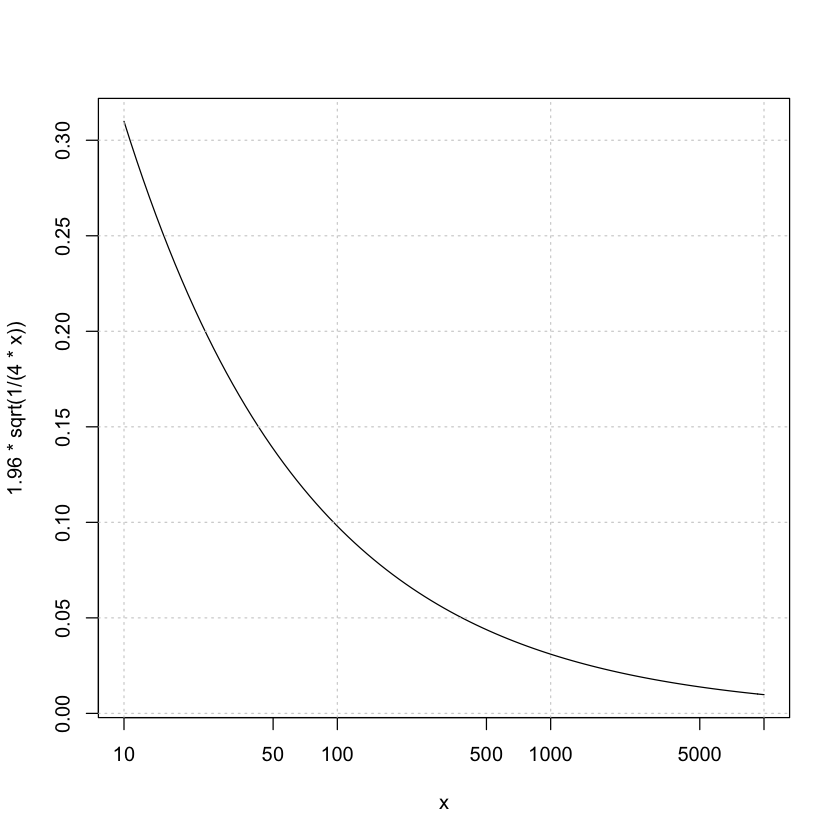

In [67]:
curve(1.96*sqrt(1/(4*x)), 10, 10000, log='x')
grid()

### Scatter plot 

두 연속형 변수 X, Y가 있을 때의 시각화는 앞장에서 살펴 보았듯이 산점도가 기본이다. 

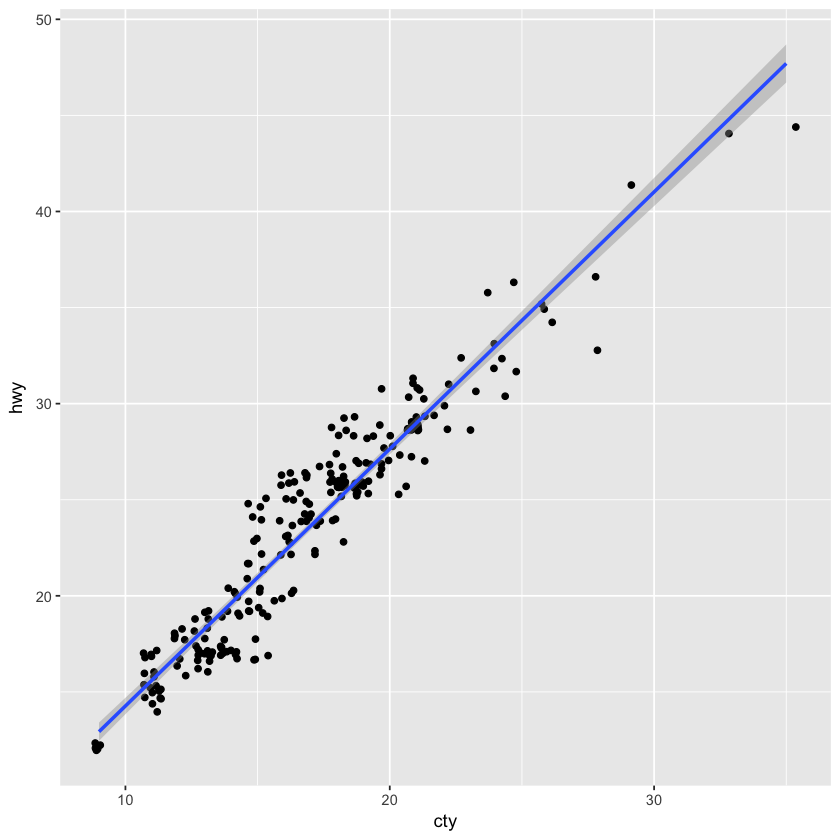

In [69]:
mpg %>%
    ggplot(aes(cty, hwy)) + geom_jitter() + geom_smooth(method='lm')

### 상관 계수 

- cor() 함수는 Correlation coefficient를 계산 해준다. 기본적으로 Pearson 상관계수를 계산 

$$Pearson Correlation = r = \dfrac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2 \times\sum(y - \bar{y})^2}}$$
Pearson 상관계수는 두 변량의 Linear correlation을 -1 $\leq$ r $\leq$ 1 의 값으로 나타낸다. 
> - 산점도를 그리지 않고 상관계수 만 보는 것은 위험하다. 
> - Pearson correlation은 비선형의 상관관계는 잡아내지 못하고, 상관계수가 산점도의 경사를 알려주지는 않기 때문이다. 

- 상관계수는 또한 이상치의 영향을 많이 받으므로 로버스트한 방법인 Kendall 의 $\tau$ 나 Spearman 의 $\rho$ 로 통계량을 계산하는 것도 좋은 방법이다. 

$\tau$ , $\rho$ 를 계사하려면, cor() 함수의 method='kendal' 과 'spearman' 옵션을 지정하면된다. 

In [70]:
cor(mpg$cty, mpg$hwy)

[1] 0.9559159

In [72]:
with(mpg, cor(cty, hwy))
with(mpg, cor(cty, hwy), method='kendall')
with(mpg, cor(cty, hwy), method='spearman')

[1] 0.9559159

[1] 0.9559159

[1] 0.9559159

### 선형회귀 모형 적합

- 여러 설명 변수 $X_1 \cdots X_p$를 사용하여 수량형 반응 변수 Y를 예측하기 위한 가장 간단하지만 유용한 모형은 Linear regression model이다.

$ Y_i\beta_0 + \beta_1 x_i i $  :: 하나의 변수 X로 이루어진 모형을 단순 회귀분석 모형이라고 하낟. 

- lm() 과 summary.lm() 함수는 위의 선형모형을 최소제곱법으로 추정한다. 
- lm.summary()은 각 추정치와 더불어 각 모수값이 0인지 아닌지에 대한 가설검정 결과를 보여준다. 

In [73]:
hwy_lm <- lm(hwy ~ cty, data=mpg)
summary(hwy_lm)

## hwy = 0.892 + 1.337 * cty 


Call:
lm(formula = hwy ~ cty, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3408 -1.2790  0.0214  1.0338  4.0461 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.89204    0.46895   1.902   0.0584 .  
cty          1.33746    0.02697  49.585   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.752 on 232 degrees of freedom
Multiple R-squared:  0.9138,	Adjusted R-squared:  0.9134 
F-statistic:  2459 on 1 and 232 DF,  p-value: < 2.2e-16


#### 모형의 적합도 검정 

`Multiple R-squared:  0.9138,	Adjusted R-squared:  0.9134 
F-statistic:  2459 on 1 and 232 DF,  p-value: < 2.2e-16`

- 위의 두줄은 모형의 적합도를 나타내는 통계량이다. Multiple R-squared: 0.9138 반응 변수의 총 변동 중 91.38%가 선형회귀 모형으로 설명된다. 결정계수는 0 에서 1사이의 값이고 1에 가까울수록 설명변수의 설명력을 높여 준다.

In [79]:
hwy_lm <- lm(hwy ~ cty, data=mpg)
print("predicted values")
tail(predict(hwy_lm))
print("Residual")
head(resid(hwy_lm))

[1] "predicted values"


229      230      231      232      233      234 
24.96624 26.30370 28.97861 22.29133 24.96624 23.62879

[1] "Residual"


1          2          3          4          5          6 
4.03375791 0.02139108 3.35884669 1.02139108 3.70866914 1.03375791

In [81]:
predict(hwy_lm, newdata = data.frame(cty=c(10, 20, 30)))

predict(hwy_lm, newdata = data.frame(cty=c(10, 20, 30)), se.fit=T)

1        2        3 
14.26660 27.64115 41.01571

$fit
       1        2        3 
14.26660 27.64115 41.01571 

$se.fit
        1         2         3 
0.2176003 0.1424778 0.3725052 

$df
[1] 232

$residual.scale
[1] 1.752289

### Categorical data | Numerical data
1. 병렬상자그림을 이용하여 데이터를 시각화, 집단 간에 평균, 중앙값의 차이가 존재하는지, 이상치가 있는지, 각 집단의 분산은 유사한지 등을 살펴본다. 
2. lm()함수로 ANOVA 선형 모형을 적용한다. summary.lm()함수로 심도있는 결과를 받을 수도 있다.

#### ANOVA
- Feature가 category 이고, Target이 Numerical 인 경우 선형모형의 특별한 예인 분산분석을 사용한다. 

- 회귀분석이나, ANOVA분석이나 수학적으로는 동일한 선형모형이다. R에서는 한 함수 lm()가 모든 경우에 쓰인다. predict.lm(), resid.lm, plot.lm()함수의 사용도 유사하다. 그리고 모수에 대한 검정 절차로 사용하는 t-검정도 동일하고, 모형의 적합도를 평가하는 Multiplt $R^2, Adj.R^2$ F-test등도 동일하다. 선형모형은 이처럼 중요하다. 

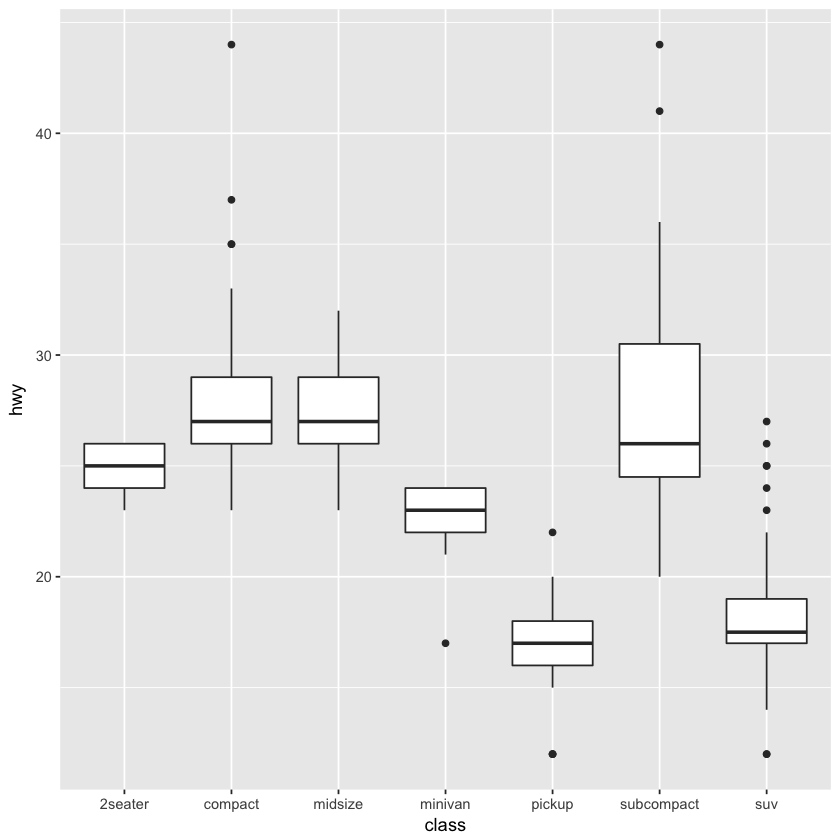

In [83]:
mpg %>% ggplot(aes(class, hwy)) + geom_boxplot()

In [84]:
hwy_lm2 <- lm(hwy ~ class, data=mpg)
summary(hwy_lm2)


Call:
lm(formula = hwy ~ class, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1429 -1.8788 -0.2927  1.1803 15.8571 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       24.800      1.507  16.454  < 2e-16 ***
classcompact       3.498      1.585   2.206   0.0284 *  
classmidsize       2.493      1.596   1.561   0.1198    
classminivan      -2.436      1.818  -1.340   0.1815    
classpickup       -7.921      1.617  -4.898 1.84e-06 ***
classsubcompact    3.343      1.611   2.075   0.0391 *  
classsuv          -6.671      1.567  -4.258 3.03e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.37 on 227 degrees of freedom
Multiple R-squared:  0.6879,	Adjusted R-squared:  0.6797 
F-statistic: 83.39 on 6 and 227 DF,  p-value: < 2.2e-16


In [86]:
tail(predict(hwy_lm2, new_data=data.frame(class='pickup')))

229      230      231      232      233      234 
27.29268 27.29268 27.29268 27.29268 27.29268 27.29268

#### 분산 분석의 진단
이론적으로, 분산분석 결과가 의미 있기 위해서는 다음 여러가지 가정이 충족되어야한다. 
1. 잔차의 분포가 독립이다. 
2. 잔차의 분산이 동일하다. 
3. 잔차의 분포가 N(0, $\sigma^2$)이다. 

중요한 것은 분포의 독립성과 outlier의 유무이다. 진단 플롯은 plot.lm()함수로 얻을 수 있다. 

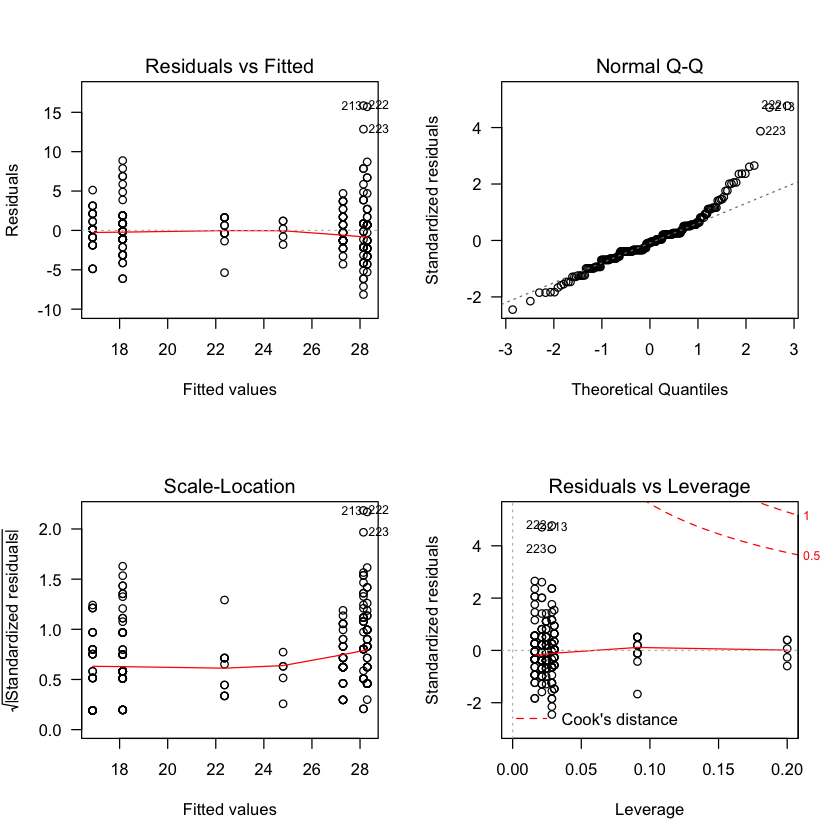

In [88]:
opar <- par(mfrow=c(2,2))
plot(hwy_lm2, las=1)
par(opar)

### Numerical -> Categorical data
1. X와 (jitter된) Y변수의 산점도를 그려본다. 그리고 Y변수의 그룹별로 X벼수의 boxplot을 그려본다. Y변수 값에 따라 X변수의 분포가 차이가 있는지, 두 변수 간에 어떤 관계가 있는지, 이상치는 존재하는지, 표본 log odds와 x의 산점도에 선형패턴이 있는지 등을 살펴본다. 
2. glm() 함수로 일반화 선형모형을 적용한다. (summary.glm())
3. plot.glm()으로 잔차의 분포를 살펴본다. 이상점은 없는가? 모형의 가정은 만족하는가 ? 

#### 일반화 선형모형, logit/logistic 함수 

- binary target을 가진 데이터는 전통적인 선형모형으로 다룰 수 없다. 기존의 선형모형은 y 의 범위가 무한대이기 때문이다. 대신 일반화 선형모형(Generalized Linear Model, GLM) 특히 이항분포 패밀리를 사용해야한다. 이처럼 이항 분포와 로짓링크 함수를 사용한 GLM모형을 로지스틱 회귀 모형이라고 한다. 


In [89]:
chall <- read.csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/challenger.csv")
chall <- tbl_df(chall)
glimpse(chall)

Observations: 23
Variables: 5
$ o_ring_ct   <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...
$ distress_ct <int> 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0...
$ temperature <int> 66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53,...
$ pressure    <int> 50, 50, 50, 50, 50, 50, 100, 100, 200, 200, 200, 200, 2...
$ launch_id   <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...


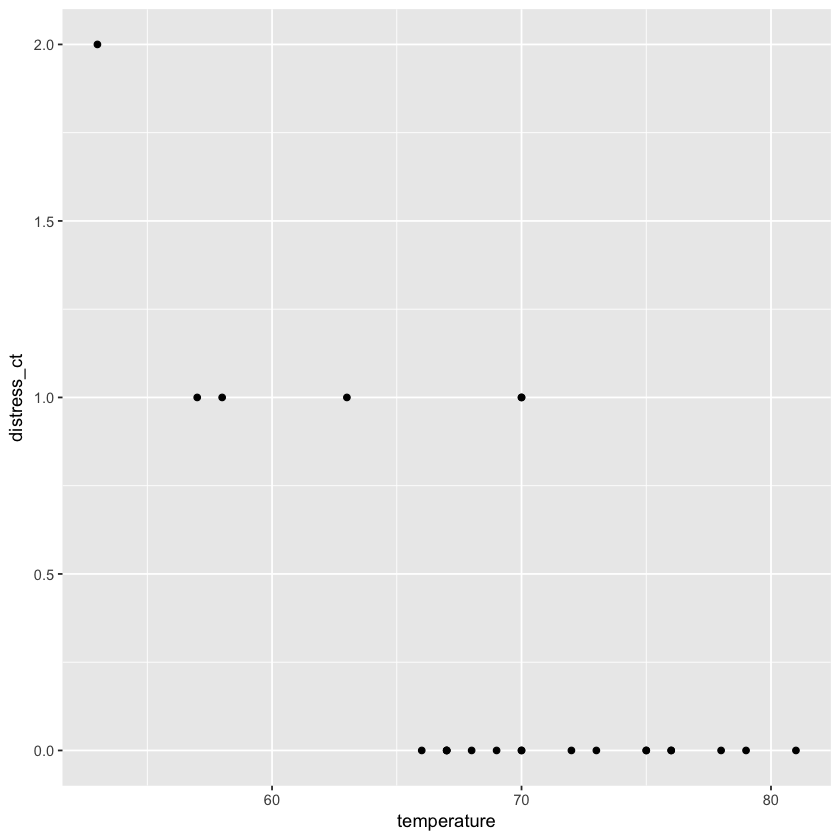

In [90]:
chall %>% ggplot(aes(temperature, distress_ct)) + geom_point()

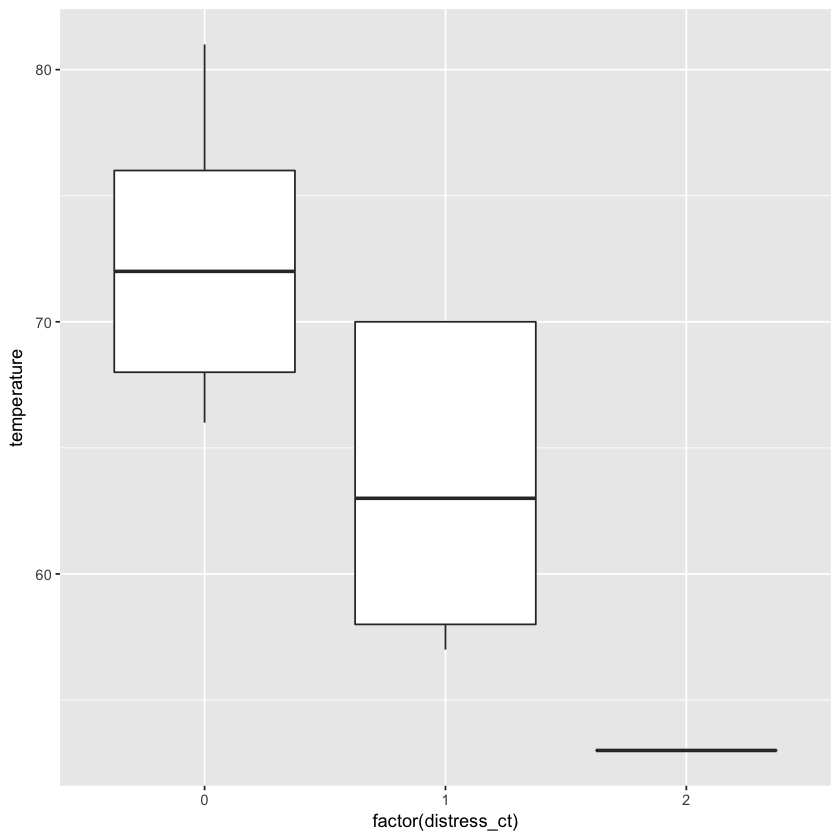

In [91]:
chall %>% ggplot(aes(factor(distress_ct), temperature)) + geom_boxplot()

In [92]:
chall_glm <- glm(cbind(distress_ct, o_ring_ct - distress_ct) ~ temperature, data=chall, family='binomial')

summary(chall_glm)


Call:
glm(formula = cbind(distress_ct, o_ring_ct - distress_ct) ~ temperature, 
    family = "binomial", data = chall)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7526  -0.5533  -0.3388  -0.1901   1.5388  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  8.81692    3.60697   2.444  0.01451 * 
temperature -0.17949    0.05822  -3.083  0.00205 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20.706  on 22  degrees of freedom
Residual deviance:  9.527  on 21  degrees of freedom
AIC: 24.865

Number of Fisher Scoring iterations: 6
